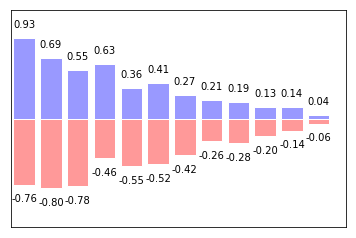

In [2]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import numpy as np # 导入 numpy 软件包并简写为 np

n = 12
X = np.arange(n) # 产生一个 0,1,2,3,4，...11 的 array

# 前面的 (1-X/float(n)) 就是随着 X 的增加会减少的一个确定的值，估计是希望有一个大致递减的效果
# 后面的 np.random.uniform(0.5,1.0,n) 表示随机生成 n 个 0.5 到 1 的均匀分布的数据
# 总的就是生成含有 n 个随机数据的 array
Y1 = (1-X/float(n))*np.random.uniform(0.5,1.0,n) 
Y2 = (1-X/float(n))*np.random.uniform(0.5,1.0,n)

# 绘制柱状图传入坐标参数 X,Y1,设置柱状图颜色为 #9999ff 设置柱状图的边框颜色为白色
plt.bar(X,+Y1,facecolor='#9999ff',edgecolor='white')
# 绘制柱状图传入坐标参数 X,-Y2,设置柱状图颜色为 #ff9999 设置柱状图的边框颜色为白色
plt.bar(X,-Y2,facecolor='#ff9999',edgecolor='white')

# 循环遍历每一个 X,Y1 在 X，Y1+0.1 的位置显示对应数值
# 设置显示数值的对齐方式，水平方向设置为中心位置，竖直方向设置为底部位置
for x,y in zip(X,Y1):
    # ha:horizontal alignment
    plt.text(x,y+0.1,'%.2f'%y,ha='center',va='bottom')
# 循环遍历每一个 X,Y2 在 X，-Y2-0.1 的位置显示对应数值
# 设置显示数值的对齐方式，水平方向设置为中心位置，竖直方向设置为顶部位置
for x,y in zip(X,Y2):
    # ha:horizontal alignment
    # 注意是 -y 因为 Y2 是正数，-%.2f 表示保留两位小数并且加一个负号
    plt.text(x,-y-0.1,'-%.2f'%y,ha='center',va='top')

plt.xlim(-0.5,n)
plt.xticks(())
plt.ylim(-1.25,1.25)
plt.yticks(())

plt.show() # 显示图片

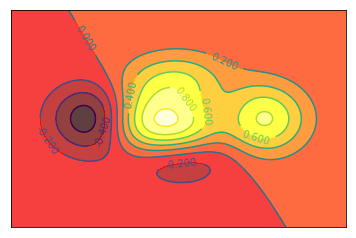

In [4]:
import numpy as np # 导入 numpy 软件包并简写为 np

# 定义一个高度函数（输入 x,y 输出高度值）
def f(x,y):
    # the height function
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n=256
x=np.linspace(-3,3,n) # 定义一个 -3 到 3 的项数为 n 的等差数列
y=np.linspace(-3,3,n) # 定义一个 -3 到 3 的项数为 n 的等差数列
X,Y=np.meshgrid(x,y) # 用 meshgrid 在二维平面中将每一个x和每一个y分别对应起来，编织成栅格

# 使用函数 plt.contourf 把颜色加进去，位置参数分别为：X, Y, f(X,Y)。
# 透明度0.75，并将 f(X,Y) 的值对应到 color map 的暖色组中寻找对应颜色
plt.contourf(X,Y,f(X,Y),8,alpha=0.75,cmap=plt.cm.hot)

# 使用 plt.contour 函数画等高线，位置参数为：X, Y, f(X,Y)，颜色选黑色，线条宽度选 0.5
# 其中，8 代表等高线的密集程度，这里被分为 10 个部分。如果是 0，则图像被一分为二
C=plt.contour(X,Y,f(X,Y),8)

# 加入 Label，inline 控制是否将 Label 画在线里面，字体大小为 10
plt.clabel(C,inline=True,fontsize=10)

# 将坐标轴隐藏
plt.xticks(())
plt.yticks(())
plt.show() # 显示图

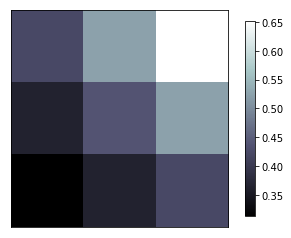

In [5]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import numpy as np # 导入 numpy 软件包并简写为 np

# image data
a=np.array([0.313,0.365,0.424,
            0.365,0.439,0.525,
            0.423,0.525,0.652]).reshape(3,3) # 定义一个三行三列的矩阵 a，后面你会发现我们画的图就是三行三列的九个方块，每一个数代表一个像素，纯黑色是 0，纯白色是 1

# plt.inshow 就是画这个灰度方块图，每一块对应的值是 a 对应的值
# origin='lower'表示是根据数据从下往上画（最后一行——>倒数第二行——>第一行）
# 如果是 upper 则会从上往下画与数据对应 
plt.imshow(a,interpolation='nearest',cmap='bone',origin='lower')
plt.colorbar(shrink=0.9) # 在右边添加标注，设置缩小比例到图片高度的 90%

# 隐藏坐标轴
plt.xticks(())
plt.yticks(())
plt.show() # 显示图片

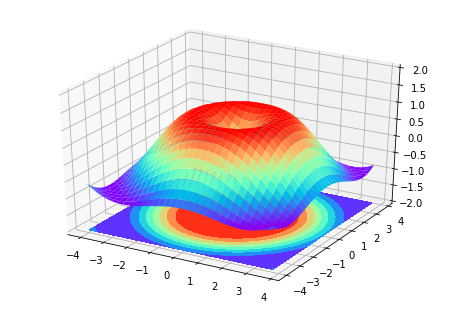

In [6]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import numpy as np # 导入 numpy 软件包并简写为 np
from mpl_toolkits.mplot3d import Axes3D # 导入 Axes3D 这个模块

fig=plt.figure() # 定义一个 figure 并赋给 fig
ax=Axes3D(fig) # 画出一个三维的坐标轴

# X,Y value
X=np.arange(-4,4,0.25)
Y=np.arange(-4,4,0.25)
X,Y=np.meshgrid(X,Y) # 形成由 X Y 数值构成的网格 
R=np.sqrt(X**2+Y**2)
# height value
Z=np.sin(R)

# 画出由坐标（X,Y,Z）组成的 3D 图，rstride 是设置行的线的密集程度，cstride 是设置列的线的秘籍程度，都是越小越密集
# cmap 是设置图像颜色，这里设置的是彩虹颜色 'rainbow'
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.get_cmap('rainbow')) 

# 将这个 3D 图投影到 xy 平面 z 为 -2 的位置，颜色设置为彩虹色
# 实际上就是画等高线
ax.contourf(X,Y,Z,zdir='z',offset=-2,cmap='rainbow')
ax.set_zlim(-2,2) # 将图片显示限制在 z 轴方向 -2 到 2 之间

plt.show() # 显示图片

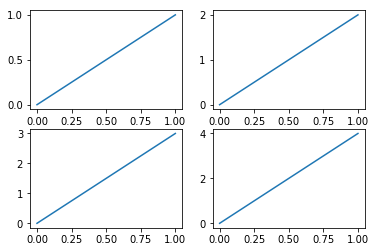

In [7]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt

plt.figure()

# 将一个 figure 分成 2 行 2 列四块区域，在第一块区域（第一行第一列）画图
plt.subplot(2,2,1) 
plt.plot([0,1],[0,1]) # 连接 [0,0],[1,1] 这两个点

plt.subplot(2,2,2) # 在第二块区域（第一行第二列）画图
plt.plot([0,1],[0,2]) # 连接 [0,0],[1,2] 这两个点

plt.subplot(2,2,3) # 在第三块区域（第二行第一列）画图
plt.plot([0,1],[0,3]) # 连接 [0,0],[1,3] 这两个点

plt.subplot(2,2,4) # 在第四块区域（第二行第二列）画图
plt.plot([0,1],[0,4]) # 连接 [0,0],[1,4] 这两个点

plt.show() # 显示图片


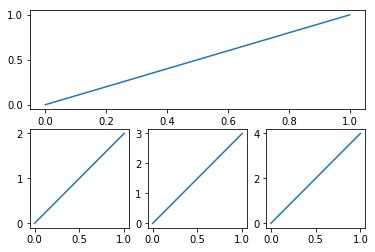

In [8]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt

plt.figure()

# 先将 figure 分为两行一列，这样画第一张图的时候就会占满一行
plt.subplot(2,1,1)
plt.plot([0,1],[0,1])

# 再将 figure 分为 2 行三列，注意是在 4 的位置画图（左下角的图）
plt.subplot(2,3,4)
plt.plot([0,1],[0,2])

plt.subplot(2,3,5) # 画下面中间的图，是在 5 的位置
plt.plot([0,1],[0,3]) 

plt.subplot(2,3,6) # 画右下角的图，是在 6 的位置
plt.plot([0,1],[0,4])

plt.show() # 显示图片

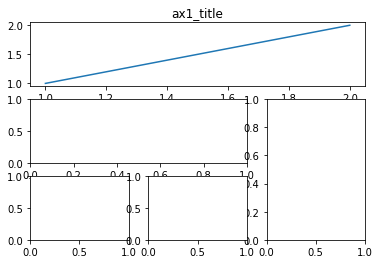

In [9]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt

# method 1:subplot2grid
# 创建一个 figure
plt.figure()
# 第一张图
# 将 figure 分为 3 行 3 列，9 块正方形区域
# 从第 0 行第 0 列那块正方形区域起开始画图
# 列跨 3 列，行跨 1 行
ax1=plt.subplot2grid((3,3),(0,0),colspan=3,rowspan=1)
# 连接 [1,1] [2,2] 这两个点
ax1.plot([1,2],[1,2])
# 加上标题标签 ax1_title
ax1.set_title('ax1_title')

# 第二张图
# 从第 1 行第 0 列那块正方形区域起开始画图
# 列跨 2 列，行跨 1 行
ax2=plt.subplot2grid((3,3),(1,0),colspan=2,rowspan=1)

# 第三张图
# 从第 1 行第 2 列那块正方形区域起开始画图
# 列跨 1 列，行跨 2 行
ax3=plt.subplot2grid((3,3),(1,2),colspan=1,rowspan=2)

# 第四张图
# 从第 2 行第 0 列那块正方形区域起开始画图
# 列跨 1 列，行跨 1 行，因为（colspan 和 rowspan）默认的参数为 1
ax4=plt.subplot2grid((3,3),(2,0))

# 第五张图
# 从第 2 行第 1 列那块正方形区域起开始画图
# 列跨 1 列，行跨 1 行
ax1=plt.subplot2grid((3,3),(2,1))

plt.show() # 显示图片

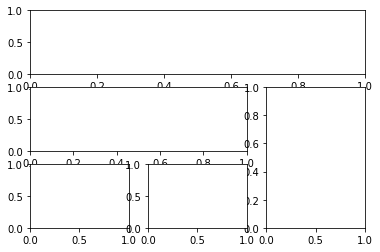

In [10]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import matplotlib.gridspec as gridspec # 导入 matplotlib 中的 gridspec 函数，并简写为 gridspec

# method 2:gridspec
########################
# 创建一个 figure
plt.figure()
# 用 gridspec 的 GridSpec 将 figure 划分为 3 行 3 列，9 个正方形区域
gs=gridspec.GridSpec(3,3)

# 用索引的方法将图像分格显示
# 第 0 行画一张图
ax1=plt.subplot(gs[0,:])
# 第 1 行第 0 和 1 列画一张图
ax2=plt.subplot(gs[1,:2])
# 第 1 和 2 行第 2 列画一张图 
ax3=plt.subplot(gs[1:,2])
# 最后 1 行第 0 列画一张图
ax4=plt.subplot(gs[-1,0])
# 最后 1 行倒数第 2 列画一张图
ax5=plt.subplot(gs[-1,-2])

plt.show() # 显示图片

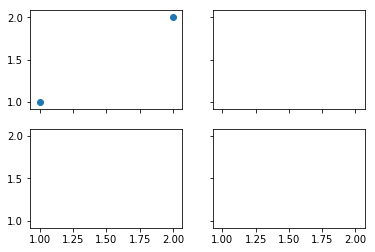

In [11]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
# method 3:easy to define structure
########################
# 用 subplots 注意有 s，定义这个 figure 的结构为 2 行 2 列，四个正方形区域
# 可以共享 x 轴和 y 轴
# 设置 4 个 ax,ax11(第一行第一列)，ax12(第一行第二列)，ax21(第二行第一列)，ax22(第二行第二列)
# 把 figure 传给 f 可以通过 f 该标题标签等等
f,((ax11,ax12),(ax21,ax22))=plt.subplots(2,2,sharex=True,sharey=True)

# 在第一行第一列的图 ax11 画散点图，两个点的坐标分别为 [1,1],[2,2]
ax11.scatter([1,2],[1,2])

plt.show() # 显示图片

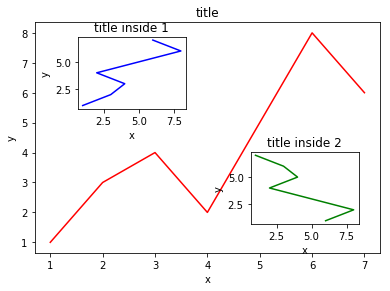

In [12]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt

# 定义一个 figure
fig=plt.figure()
x=[1,2,3,4,5,6,7] 
y=[1,3,4,2,5,8,6]

# 下面的代码意思是在整个 figure 从左边起 10% 的宽度从下面起 10% 的高度画 80% 宽度 80% 高度的图
# 这个百分分数是相对于整个 figure 的宽高而言的
left,bottom,width,height=0.1,0.1,0.8,0.8
# 画第一个 ax 传入上面的四个参数
ax1=fig.add_axes([left,bottom,width,height])
# 画红色的折线
ax1.plot(x,y,'r')
# 设置 x 轴标签为 x
ax1.set_xlabel('x')
# 设置 y 轴标签为 y
ax1.set_ylabel('y')
# 设置图片标题为 title
ax1.set_title('title')

# 画图中图
# 下面的代码意思是在整个 figure 从左边起 20% 的宽度从下面起 60% 的高度画 25% 宽度 825% 高度的图
# 这个百分分数是相对于整个 figure 的宽高而言的
left,bottom,width,height=0.2,0.6,0.25,0.25
ax2=fig.add_axes([left,bottom,width,height])
# 交换 x,y 位置画绿色的折线
ax2.plot(y,x,'b')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('title inside 1')


# 用另外一种方法画图中图
# 括号中的参数仍然是 left,bottom,width,height
plt.axes([0.6,0.2,0.25,0.25])
# 将 y 倒序 x 不变画绿色折线图
plt.plot(y[::-1],x,'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('title inside 2')

plt.show() # 显示图片

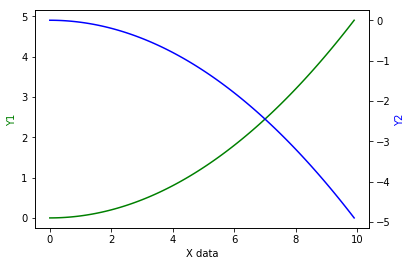

In [13]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import numpy as np # 导入 numpy 包并简写为 np

# 定义 0 到 10 的公差为 0.1 的等差数列
x=np.arange(0,10,0.1)
# y1 为 0.05*x 的二次方
y1=0.05*x**2
# y1 y2 互为相反数
y2=-1*y1

# 采用以前学的分割显示的方法 subplots() 将两张图叠在一起
fig,ax1=plt.subplots()
# 生成镜面对称的效果的 ax1 的 ax2 的 y 轴
ax2=ax1.twinx()
# 画绿色的那条线
ax1.plot(x,y1,'g-')
# 画蓝色的那条线
ax2.plot(x,y2,'b-')

# 设置 ax1 的 x 轴的标签为 X data
ax1.set_xlabel('X data')
# 设置 ax1 的 y 轴标签为 Y1 颜色为绿色
ax1.set_ylabel('Y1',color='g')
# 设置 ax2 的 y 轴标签为 Y2 颜色为蓝色
ax2.set_ylabel('Y2',color='b')

plt.show() # 显示图片

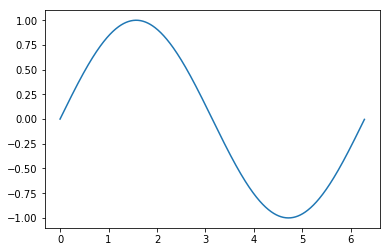

In [14]:
import matplotlib.pyplot as plt # 导入 matplotlib 软件包中的 pyplot 模块并简写为 plt
import numpy as np # 导入 nump 并简写为 np
from matplotlib import animation # 导入 animation

# 创建一个 fig
fig,ax=plt.subplots()

# 画一个 0 到 2pi 的 sin 函数的动画
x=np.arange(0,2*np.pi,0.01)
# 后面有逗号是因为返回的是一个列表，我们只需要其中的第一个元素
line,=ax.plot(x,np.sin(x))

# 定义函数 animate 后面会用到，i 的除数越大曲线移动越快
def animate(i):
    line.set_ydata(np.sin(x+i/10))
    return line,

# 定义 init 初始函数，后面会用
def init():
    line.set_ydata(np.sin(x))
    return line,

# 画动画，fig 是传入定义的 figure,frames 表示用几帧，interval 表示间隔多少毫秒动一次 
ani=animation.FuncAnimation(fig=fig,func=animate,frames=100,init_func=init,interval=20,blit=False)

plt.show() # 显示图片